# Analyse of taxi companies in Peru: about clients, about drivers.
1. Which platform has the required number of successful operations?
2. Check how the driver scores (driver_score) are distributed?
3. Which driver were the most late
4. Amount of orders per month_mau_wau_dau


In [15]:
def read_n_agg(file):
    df = pd.read_csv('3_companies.csv', sep=';')
    df = df.groupby(['company']).agg({'income':'mean'})
    return df

In [16]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plp

%matplotlib inline
taxi = pd.read_csv('3_taxi_peru.csv', sep=';',parse_dates=['arrived_at', 'end_at','start_at'])

In [17]:
taxi.shape

(23111, 19)

In [18]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN


###### 1. Which platform has the required number of successful operations?

iPhone orders are 42,15% of all orders, which is 9741 orders

In [19]:
all_amounts_orders= taxi.source.value_counts()/len(taxi)*100

In [20]:
all_amounts_orders 

iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: source, dtype: float64

In [21]:
taxi_orders=taxi.groupby('source', as_index=False)\
                .agg({'user_id':'count'})\
                .sort_values('user_id', ascending=False)

In [22]:
taxi_orders

,source,user_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


<AxesSubplot:xlabel='source', ylabel='user_id'>

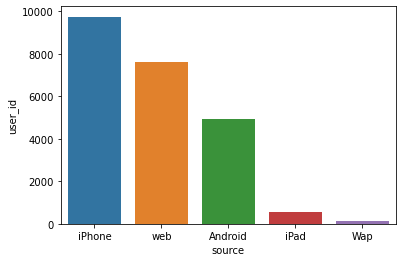

In [23]:
sns.barplot(x='source', y='user_id', data=taxi_orders)

<AxesSubplot:xlabel='source', ylabel='count'>

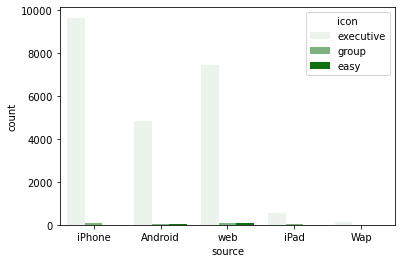

In [24]:
sns.countplot(x='source',hue='icon', data=taxi, color='green')

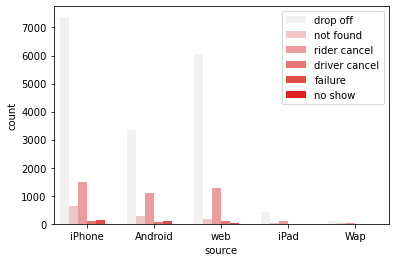

In [25]:
sns.countplot(x='source',hue='end_state', data=taxi, color='red').legend(loc='upper right')

###### 2. Check how the driver and rider scores (driver and rider score) are distributed?

In [35]:
driver_score_counts=taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index()\
                        .rename(columns={'index':'driver_score','driver_score':'percentage'})\
                        .sort_values('driver_score')

In [34]:
driver_score_counts

,driver_score,percentage
2,0.0,14.28
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.89
0,5.0,58.82


In [28]:
rider_score_counts=taxi.rider_score.value_counts(normalize=True)\
                                   .mul(100).round(2).reset_index()\
                                   .rename(columns={'index':'rider_score','rider_score':'percentage'})\
                                   .sort_values('rider_score')

In [29]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


In [30]:
#Let's bring start_at, end_at, arrived_at to date format. 
#Check status "asap" и "reserved" (start_type) .

In [31]:
taxi['start_at']=pd.to_datetime(taxi['start_at'])
taxi['end_at']=pd.to_datetime(taxi['end_at'])
taxi['arrived_at']=pd.to_datetime(taxi['arrived_at'])
taxi=taxi.query('start_type=="asap" | start_type=="reserved"')

In [32]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN


In [36]:
#Create column wait_time: (arrived_at) - (start_at)

In [37]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at
taxi['wait_time'] = taxi.wait_time.astype('timedelta64[m]')

In [38]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN


###### 3.Which driver were the most late

In [39]:
#let's (start_type == 'reserved'). 
#wait_time > 0.0.

In [42]:
late_driver=taxi.query('start_type =="reserved" and wait_time>0')\
                .groupby('driver_id')\
                .agg({'journey_id':'count'})\
                .idxmax()

In [43]:
late_driver

journey_id    406921adcca37705ef527b4246c0cfea
dtype: object

In [47]:
#We add column month and column weekday, when order was made (start_at). 

In [48]:
taxi['month']=taxi['start_at'].dt.month
taxi['weekday']=taxi['start_at'].dt.strftime('%A')

In [49]:
taxi['weekday']=taxi['start_at'].dt.strftime('%A')

In [50]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday


###### 4. Amount of orders per month_mau_wau_dau

In [51]:
# Graphic of amount of orders of month. 

<AxesSubplot:xlabel='month', ylabel='count'>

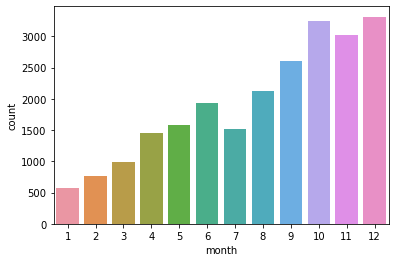

In [52]:
sns.countplot(data=taxi, x='month')

<AxesSubplot:xlabel='weekday', ylabel='count'>

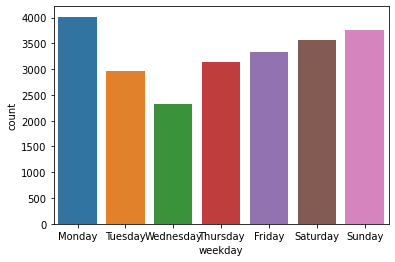

In [53]:
sns.countplot(data=taxi, x='weekday', order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])

In [55]:
#we check:
# DAU (daily active users) – unique users per day
# WAU (weekly active users) – unique users per week
# MAU (monthly active users) – unique users per month

In [56]:
MAU=taxi.groupby('month', as_index=False).agg({'user_id': 'count', 'user_id': 'nunique'})

In [57]:
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


<AxesSubplot:xlabel='month', ylabel='user_id'>

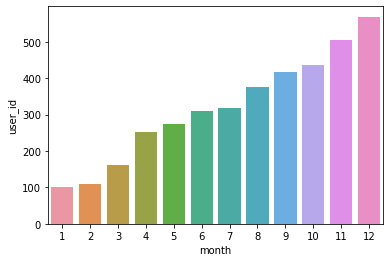

In [58]:
MAU=taxi.groupby('month', as_index=False).agg({'user_id': 'nunique'})
sns.barplot(x='month', y='user_id', data=MAU)

In [59]:
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


In [60]:
MAU_unique=taxi.drop_duplicates(subset=['user_id'])

In [63]:
MAU_unique.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


<AxesSubplot:xlabel='month', ylabel='count'>

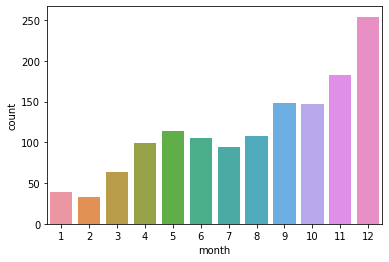

In [64]:
MAU_unique=taxi.drop_duplicates(subset=['user_id'])
sns.countplot(x='month', data=MAU_unique)

In [65]:
taxi.user_id.nunique()

1388